# Linear Bivariate BMM with JETSCAPE models : step mixing

<!-- The best way to learn Taweret is to use it. You can run, modify and experiment with this notebook [here.](https://mybinder.org/v2/gh/danOSU/Taweret/c2d8fd3ce3d74a5891d51adb5afc0afa0b503127?urlpath=lab%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FLinear_BMM_with_step_function_for_SAMBA_models.ipynb) -->



This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

Author : Dan Liyanage 

Date : 01/03/2023



In [1]:
import sys
import os
os.environ["WORKDIR"] = "/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes"
# You will have to change the following imports depending on where you have 
# the packages installed
# If using binder please uncomment the followings.
#sys.path.append("/home/jovyan/")
sys.path.append("/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/src")
sys.path.append("/Users/dananjayaliyanage/git/Taweret/")

from configurations import *
from emulator import *
#sys.path.append("/Users/dananjayaliyanage/git/Taweret")
#sys.path.append("/Users/dananjayaliyanage/git/Taweret/subpackages/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
#import bilby

# For other operations
import numpy as np
import bilby

Using idf = 3 : Pratt-Torrieri-Bernhard
SystemsInfo = 
{'Pb-Pb-2760': {'proj': 'Pb', 'targ': 'Pb', 'sqrts': 2760, 'main_design_file': '/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat', 'main_range_file': '/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat', 'validation_design_file': '/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production/design_points_validation_PbPb-2760.dat', 'validation_range_file': '/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/production_designs/design_pts_Pb_Pb_2760_production//design_ranges_validation_PbPb-2760.dat', 'labels': ['$N$[$2.76$TeV]', '$p$', '$\\sigma_k$', '$w$ [fm]', '$d_{\\mathrm{min}}$ [fm]', '$\\tau_R$ [fm/$c$]', '$\\alpha$', '$T_{\\eta,\\mathrm{kink}}$ [GeV]', '$a_{\\eta,\\math

In [2]:
!echo ${WORKDIR}

/Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes


## 1. Get toy models and the experimental data

In [3]:
obs_to_remove = ['dN_dy_Lambda', 'dN_dy_Omega', 'dN_dy_Xi']

In [4]:
# Toy models from SAMBA
from Taweret.models import jetscape_sims_models as sims

m1 = sims.jetscape_models_pb_pb_2760(fix_MAP=True,model_num=0, obs_to_remove=obs_to_remove)
m2 = sims.jetscape_models_pb_pb_2760(fix_MAP=True,model_num=3, obs_to_remove=obs_to_remove)
#exp = sims.exp_data()

Loading experimental data from /Users/dananjayaliyanage/git/Taweret/subpackages/js-sims-bayes/HIC_experimental_data


In [5]:
exp = sims.exp_data()

In [6]:
qq1,qq2,qq3,_=exp.evaluate(input_values=None, obs_to_remove=obs_to_remove)

In [7]:
len(qq1)

110

In [8]:
len(qq3)==len(qq1)==len(qq2)

True

In [9]:
g = np.linspace(0, 60, 20)
plot_g = np.linspace(0.0,60,100)
m1_prediction = m1.evaluate(qq1)
m2_prediction = m2.evaluate(qq1)
#true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(input_values=None, obs_to_remove=obs_to_remove)

In [10]:
len(exp_data)

4

In [11]:
exp_data[0][exp_data[3]['dNch_deta']]

array([2.5 , 1.25])

In [12]:
m1_prediction[1].shape

(110,)

In [13]:
def slice_array(array,slice_interval):
    return array[slice_interval[0]:slice_interval[1]]
    

['dNch_deta', 'dET_deta', 'dN_dy_pion', 'dN_dy_kaon', 'dN_dy_proton', 'mean_pT_pion', 'mean_pT_kaon', 'mean_pT_proton', 'pT_fluct', 'v22', 'v32', 'v42']


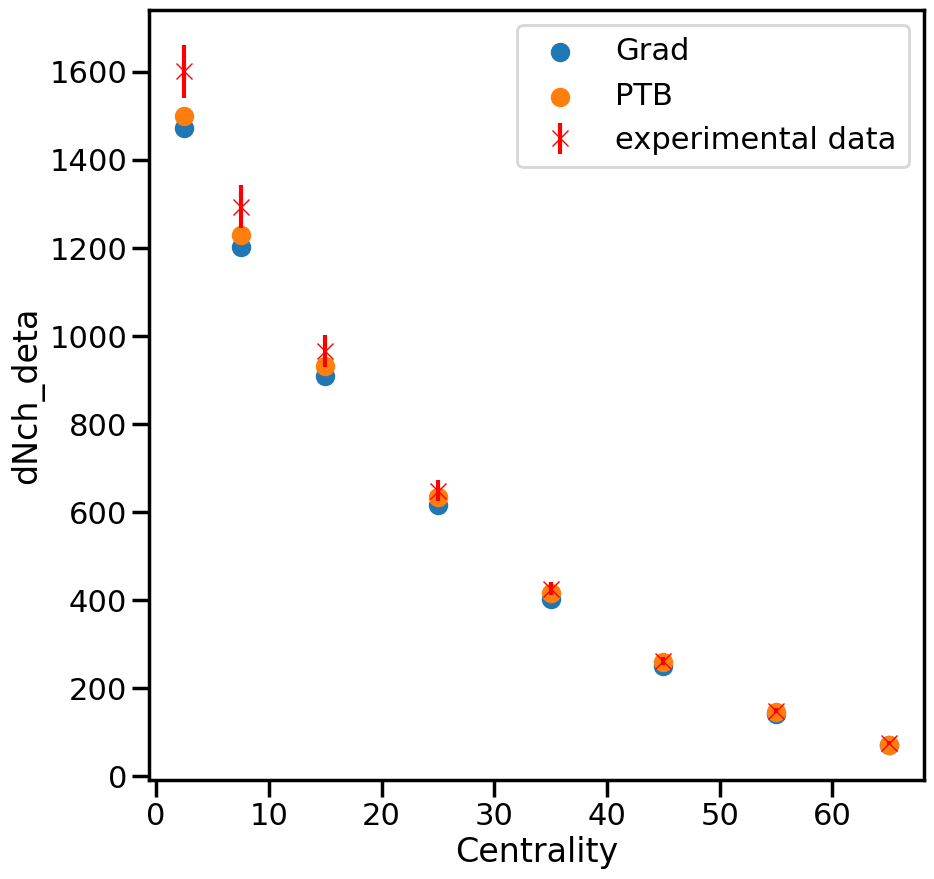

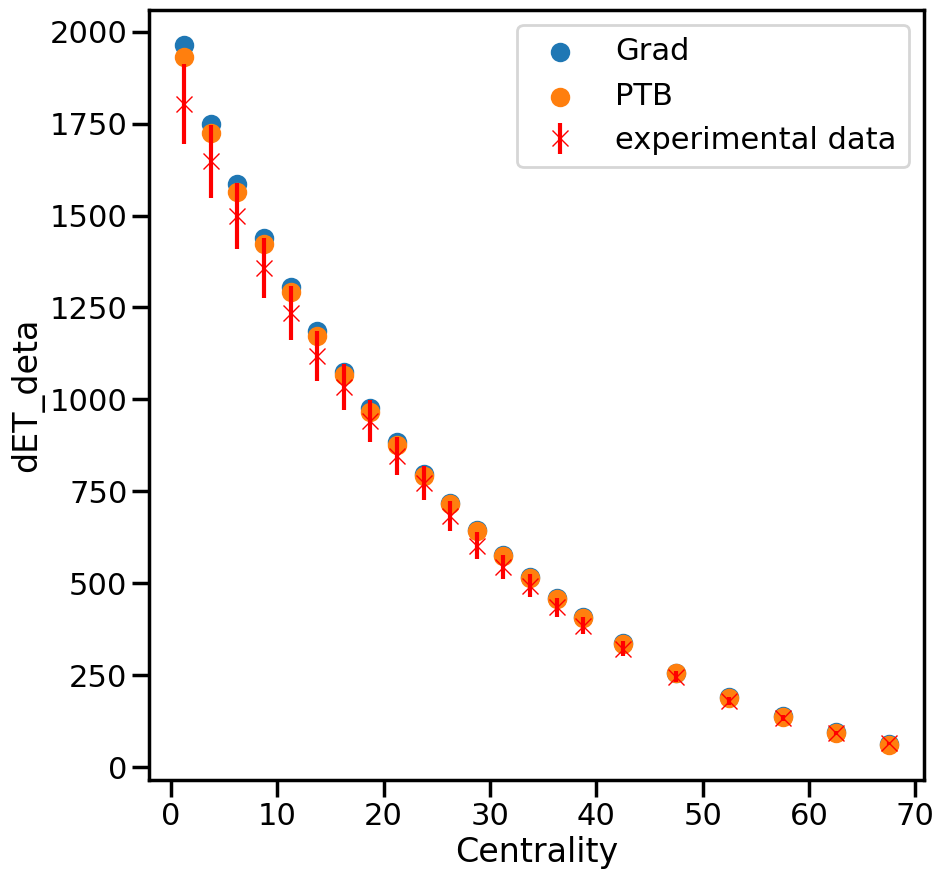

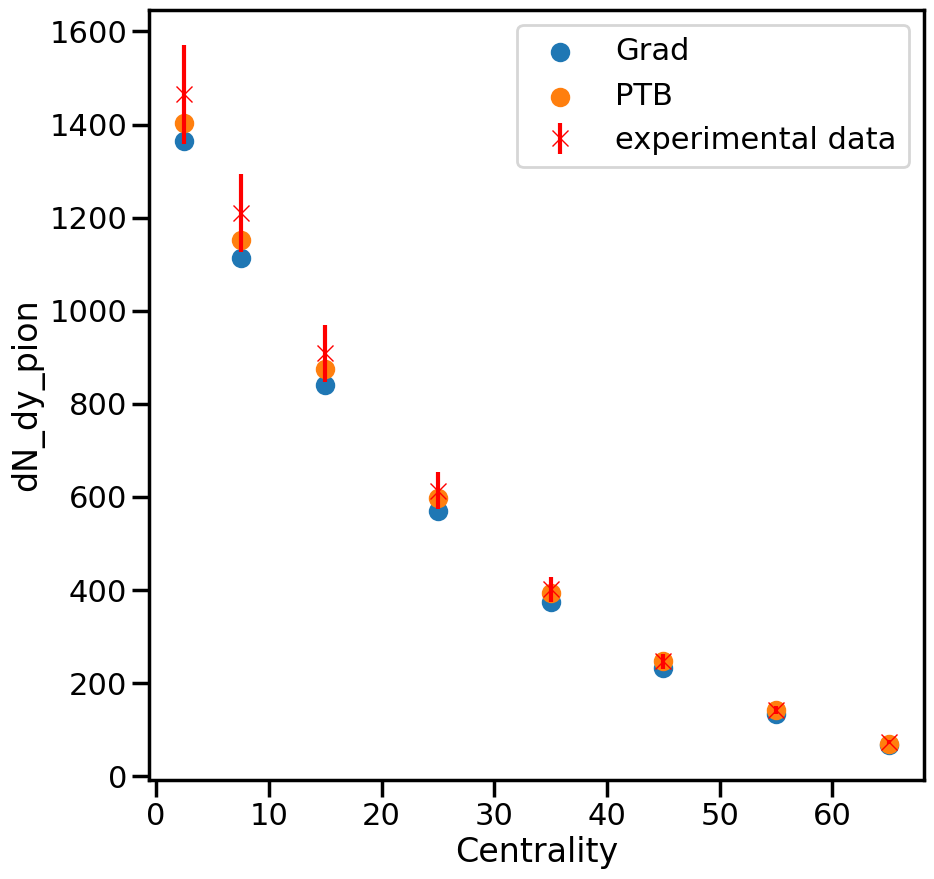

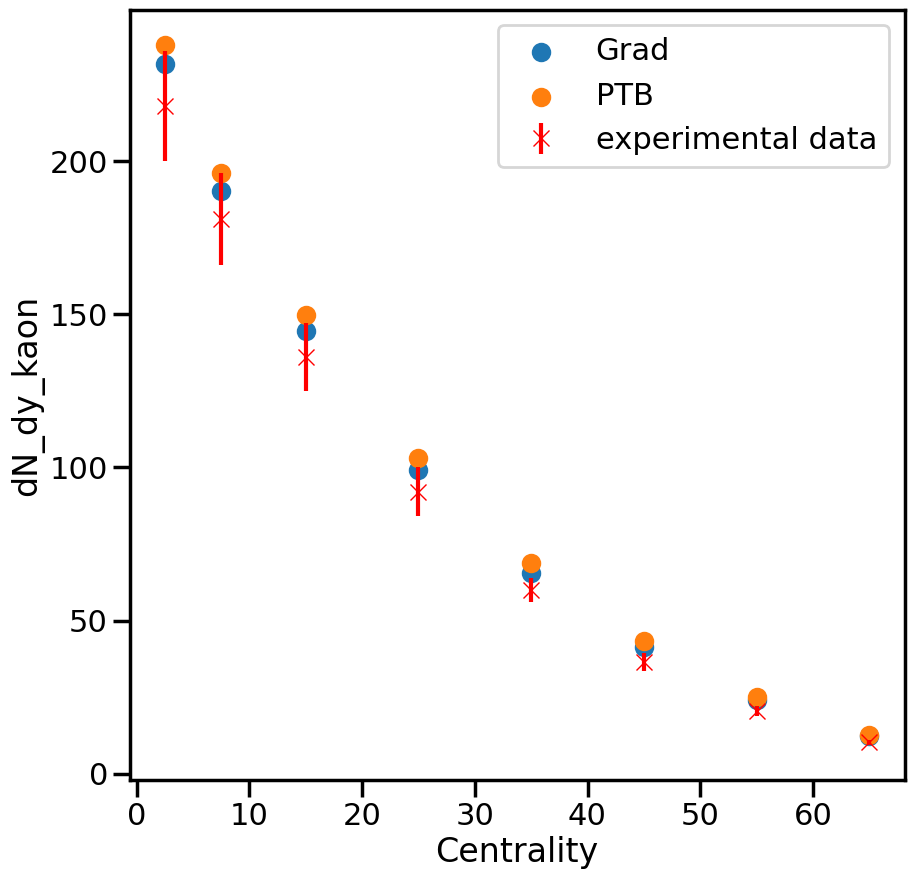

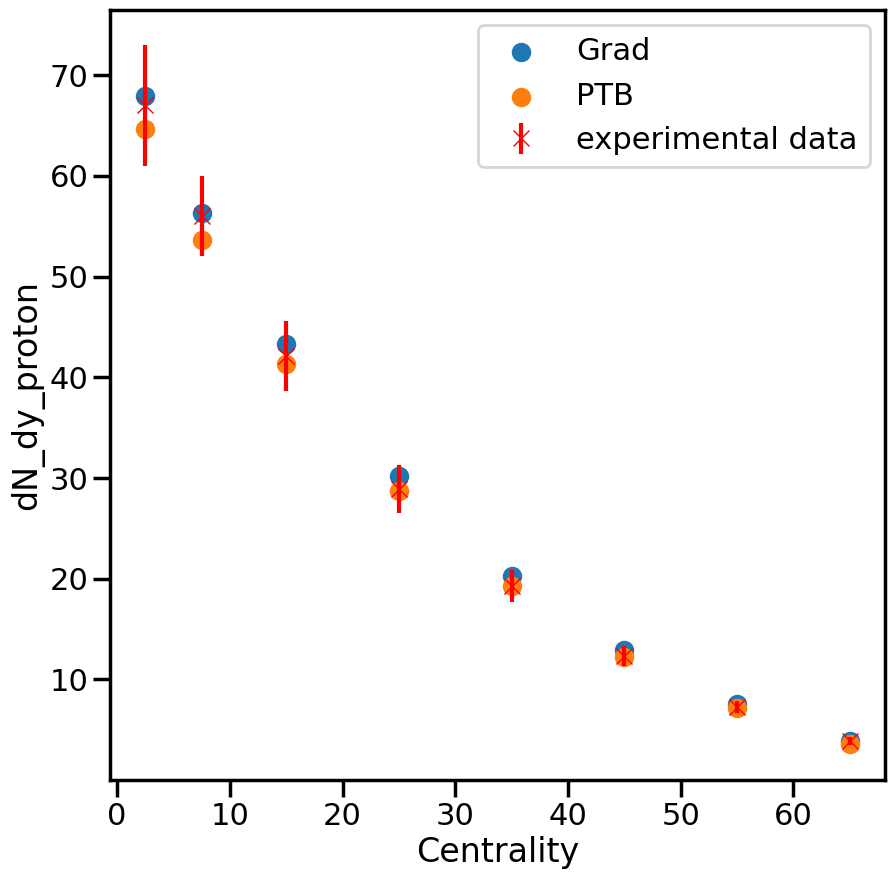

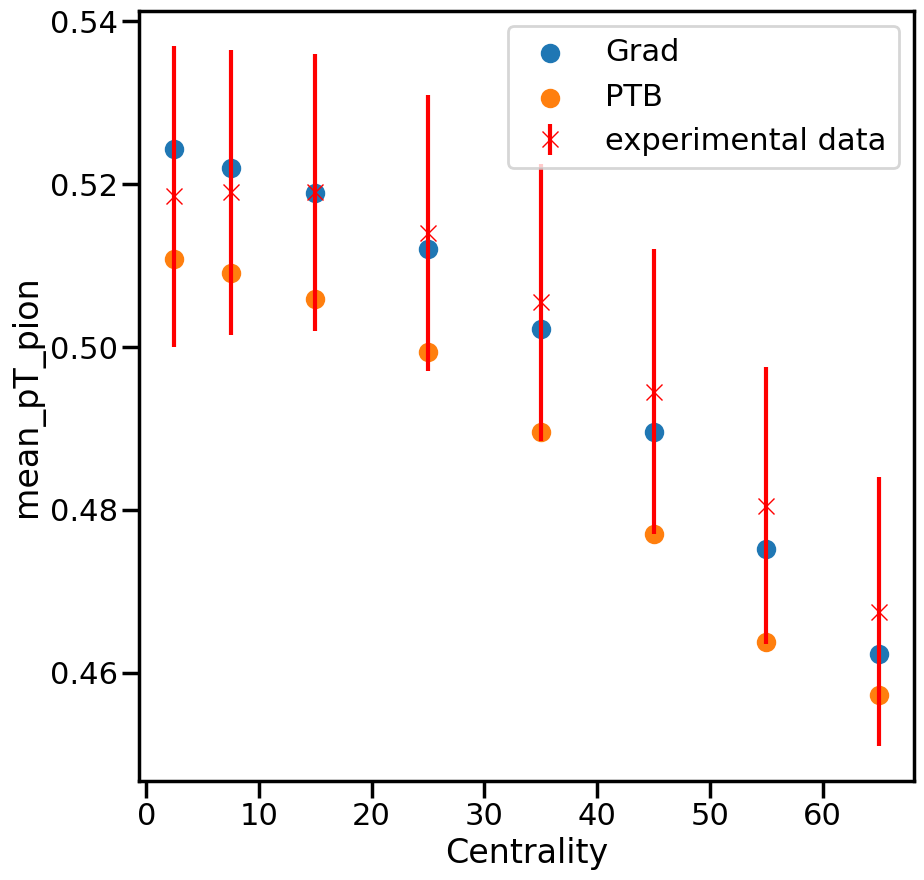

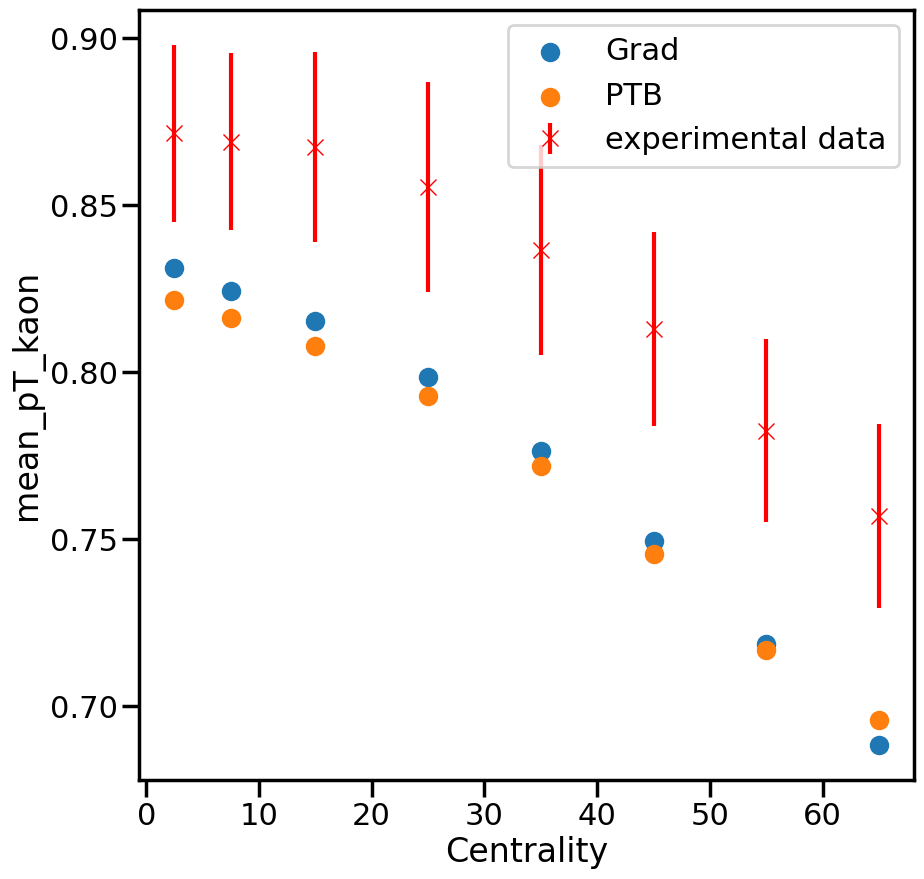

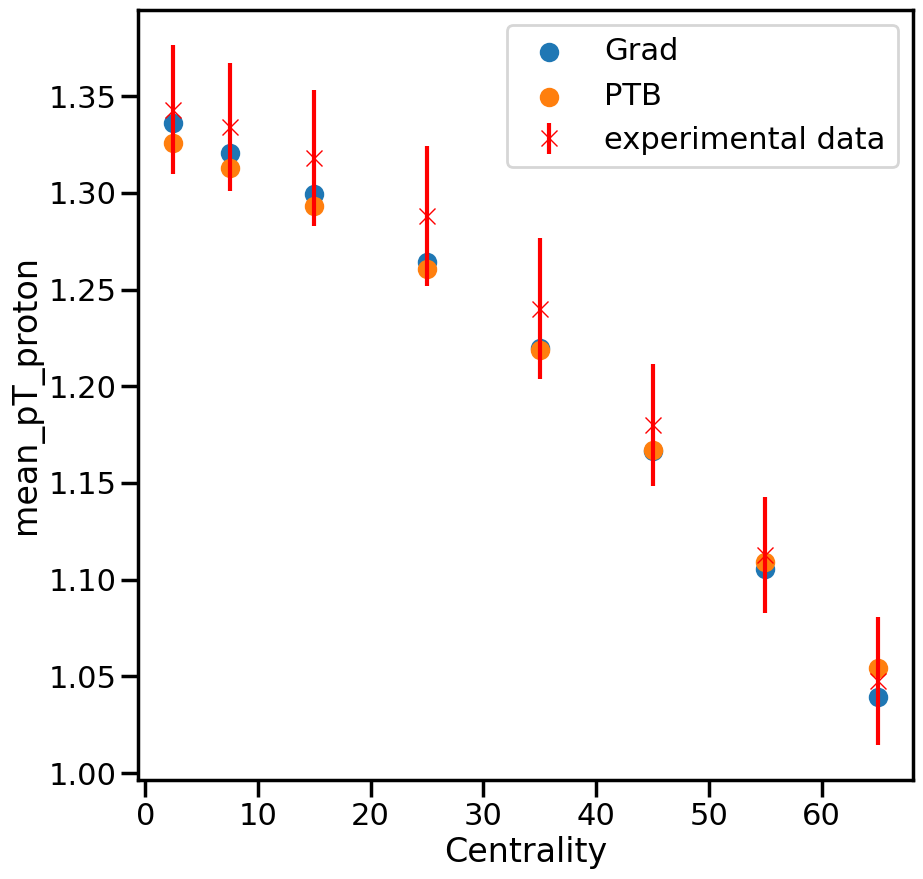

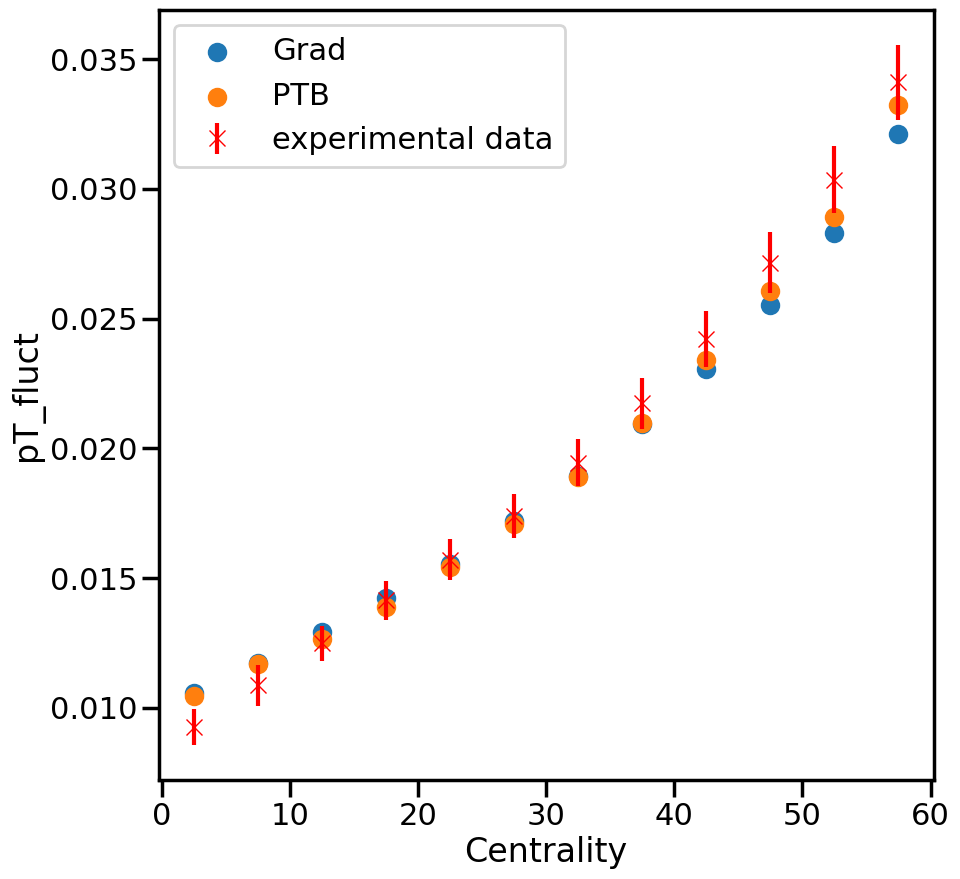

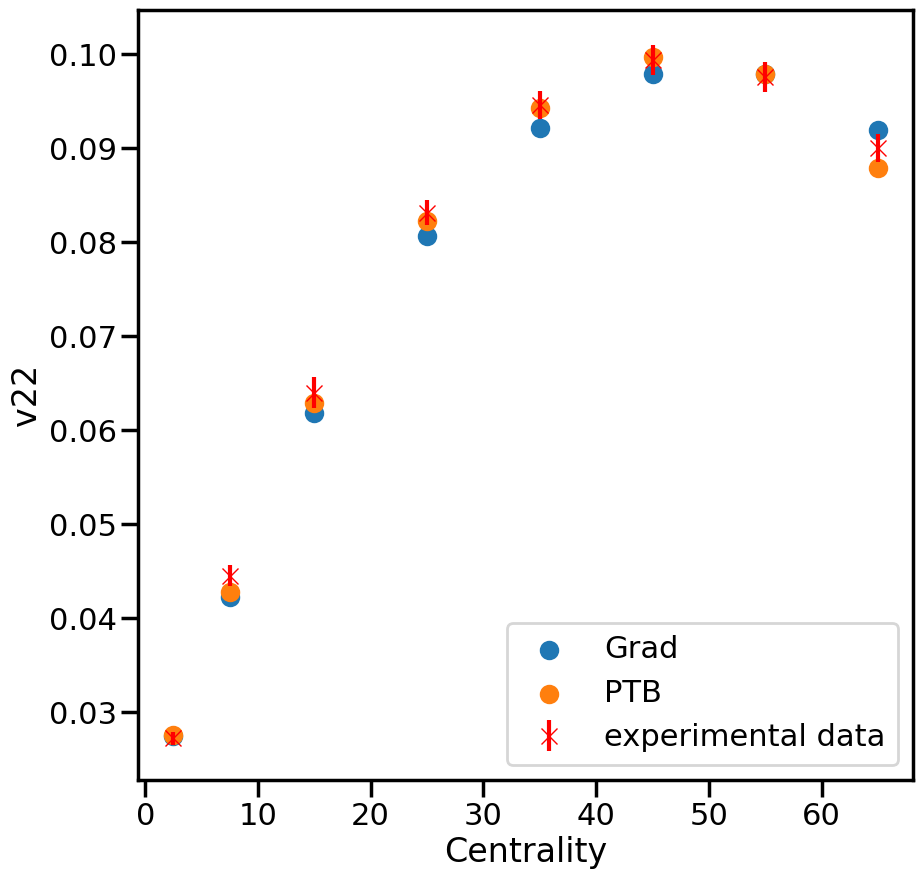

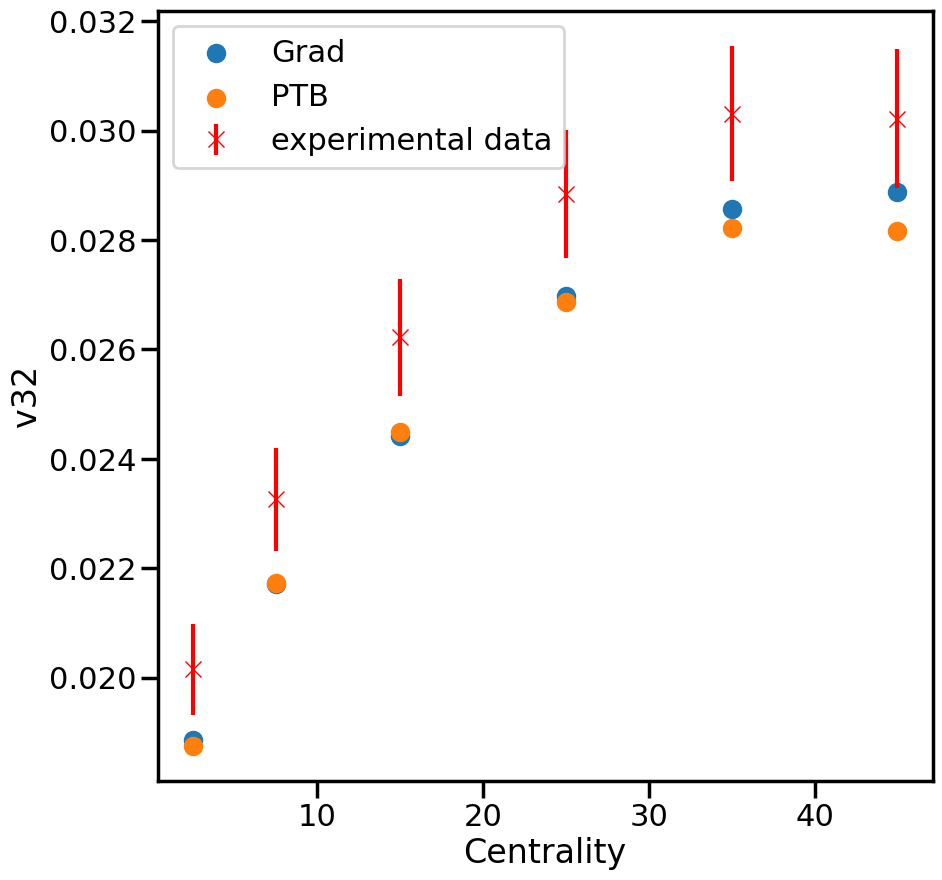

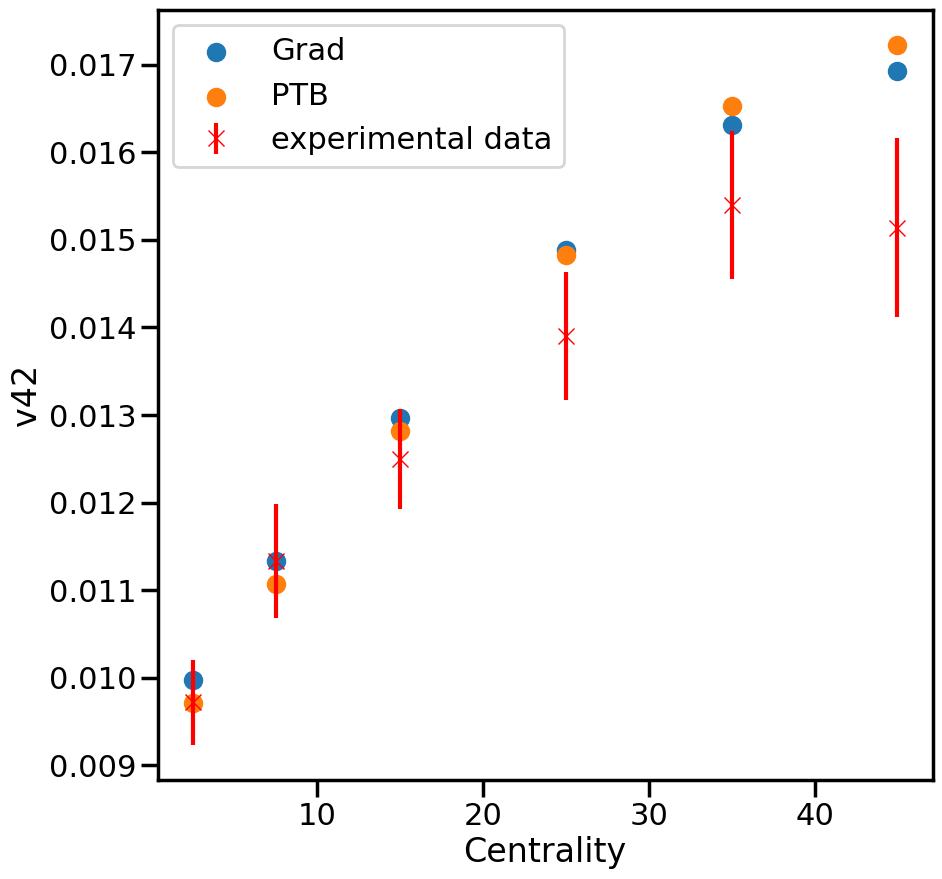

In [14]:
obs_names = list(obs_cent_list['Pb-Pb-2760'].keys())
for i in obs_to_remove:
    obs_names.remove(i)
print(obs_names)
for i in range(0,12):
    obs_name = obs_names[i]
    g = slice_array(exp_data[0], exp_data[3][obs_name])
    exp_d = slice_array(exp_data[1], exp_data[3][obs_name])
    exp_er = slice_array(exp_data[2], exp_data[3][obs_name])
    m1_predict = slice_array(m1_prediction[0], exp_data[3][obs_name])
    m2_predict = slice_array(m2_prediction[0], exp_data[3][obs_name])
    fig, ax_f = plt.subplots(figsize=(10,10))
    ax_f.scatter(g, m1_predict.flatten(), label='Grad')
    ax_f.scatter(g, m2_predict.flatten(), label='PTB')
    #ax_f.plot(plot_g, true_output[0], label='truth')
    #ax_f.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data')
    ax_f.set_xlabel('Centrality')
    ax_f.errorbar(g,exp_d.flatten(), 
                yerr=exp_er.flatten(),
                fmt='x', label='experimental data', color='r')
    #ax_f.set_ylim(1.2,3.2)
    ax_f.set_ylabel(obs_name)
    ax_f.legend()

##  2. Choose a Mixing method

In [15]:
from Taweret.core.base_model import BaseModel
isinstance(m1, BaseModel)

True

In [16]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'Grad':m1,'PTB':m2}
mix_model = BL(models_dic=models, method='addstepasym')

addstepasym mixing function has 3 free parameter(s)
To change the prior use `set_prior` method


In [17]:
#uncoment to change the prior from the default
priors = bilby.core.prior.PriorDict()
priors['addstep_0'] = bilby.core.prior.Uniform(0, 60, name="addstep_0")
priors['addstep_1'] = bilby.core.prior.Uniform(0, 60, name="addstep_1")
priors['addstep_2'] = bilby.core.prior.Uniform(0, 1, name="addstep_2")
mix_model.set_prior(priors)

{'addstep_0': Uniform(minimum=0, maximum=60, name='addstep_0', latex_label='addstep_0', unit=None, boundary=None),
 'addstep_1': Uniform(minimum=0, maximum=60, name='addstep_1', latex_label='addstep_1', unit=None, boundary=None),
 'addstep_2': Uniform(minimum=0, maximum=1, name='addstep_2', latex_label='addstep_2', unit=None, boundary=None)}

## 3. Train to find posterior

In [18]:
#sampler_args = {'sampler': 'ptemcee', 'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'burn_in_fixed_discard': 200, 'nsamples': 2000, 'printdt': 60}

In [19]:
#result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1], outdir = 'outdir/samba_bivaraite', label='step_mix')
outdir = 'outdir/samba_bivaraite_grad_ptb_total_addstepasym_prop_exp'
result = mix_model.train(x_exp=exp_data[0], y_exp=exp_data[1], y_err=exp_data[2], outdir = outdir, label='addstepasym_mix', 
                        load_previous=True,)
                        #kwargs_for_sampler=sampler_args)

19:35 bilby INFO    : Running for label 'addstepasym_mix', output will be saved to 'outdir/samba_bivaraite_grad_ptb_total_addstepasym_prop_exp'
19:35 bilby INFO    : Search parameters:
19:35 bilby INFO    :   addstep_0 = Uniform(minimum=0, maximum=60, name='addstep_0', latex_label='addstep_0', unit=None, boundary=None)
19:35 bilby INFO    :   addstep_1 = Uniform(minimum=0, maximum=60, name='addstep_1', latex_label='addstep_1', unit=None, boundary=None)
19:35 bilby INFO    :   addstep_2 = Uniform(minimum=0, maximum=1, name='addstep_2', latex_label='addstep_2', unit=None, boundary=None)


Saved results do not exist in : outdir/samba_bivaraite_grad_ptb_total_addstepasym_prop_exp/addstepasym_mix
The following Default settings for sampler will be used. You can change    these arguments by providing kwargs_for_sampler argement in `train`.    Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 10, 'nwalkers': 200, 'Tmax': 100, 'burn_in_fixed_discard': 500, 'nsamples': 8000, 'threads': 7, 'printdt': 60}


19:35 bilby INFO    : Single likelihood evaluation took 5.516e-03 s
19:35 bilby WARNING : Supplied argument 'printdt' not an argument of 'Ptemcee', removing.
19:35 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 10, 'nwalkers': 200, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
19:35 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_discard=500, mean_logl_frac=0.01, thin_by_nact=0.5, nsamples=8000, ignore_keys_for_tau=None, min_tau=1, niterations_per_check=5)
19:35 bilby INFO    : Generating pos0 samples
19:35 bilby INFO    : Starting to sample


1|0:00:13|nc:1.0e+04|a0:0.00-1.00|swp:0.90-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.40ms/ev
2|0:00:28|nc:2.0e+04|a0:0.00-0.90|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.41ms/ev
3|0:00:42|nc:3.0e+04|a0:0.13-0.80|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.43ms/ev
4|0:01:02|nc:4.0e+04|a0:0.15-0.80|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.63ms/ev
5|0:01:18|nc:5.0e+04|a0:0.16-0.72|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.68ms/ev
6|0:01:35|nc:6.0e+04|a0:0.13-0.67|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.75ms/ev
7|0:01:51|nc:7.0e+04|a0:0.20-0.66|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.63ms/ev
8|0:02:06|nc:8.0e+04|a0:0.20-0.65|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.60ms/ev
9|0:02:21|nc:9.0e+04|a0:0.20-0.64|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.53ms/ev
10|0:02:35|nc:1.0e+05|a0:0.24-0.64|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.46ms/ev
11|0:02:49|nc:1.1e+05|a0:0.25-0.64|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:

19:45 bilby INFO    : Writing checkpoint and diagnostics
19:45 bilby INFO    : Finished writing checkpoint


42|0:10:16|nc:4.2e+05|a0:0.37-0.55|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
43|0:10:28|nc:4.3e+05|a0:0.37-0.56|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
44|0:10:41|nc:4.4e+05|a0:0.37-0.55|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
45|0:10:54|nc:4.5e+05|a0:0.36-0.55|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
46|0:11:07|nc:4.6e+05|a0:0.37-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
47|0:11:21|nc:4.7e+05|a0:0.37-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
48|0:11:34|nc:4.8e+05|a0:0.37-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
49|0:11:46|nc:4.9e+05|a0:0.38-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
50|0:11:59|nc:5.0e+05|a0:0.38-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
51|0:12:13|nc:5.1e+05|a0:0.38-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
52|0:12:26|nc:5.2e+05|a0:0.39-0.54|swp:0.88-1.00|n:nan<8000|t!nan(+nan

19:55 bilby INFO    : Writing checkpoint and diagnostics
19:55 bilby INFO    : Finished writing checkpoint


89|0:20:25|nc:8.9e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
90|0:20:38|nc:9.0e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
91|0:20:50|nc:9.1e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.33ms/ev
92|0:21:03|nc:9.2e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
93|0:21:16|nc:9.3e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
94|0:21:29|nc:9.4e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
95|0:21:42|nc:9.5e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
96|0:21:54|nc:9.6e+05|a0:0.41-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
97|0:22:08|nc:9.7e+05|a0:0.40-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
98|0:22:21|nc:9.8e+05|a0:0.40-0.52|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
99|0:22:34|nc:9.9e+05|a0:0.41-0.53|swp:0.88-1.00|n:nan<8000|t!nan(+nan

20:05 bilby INFO    : Writing checkpoint and diagnostics
20:05 bilby INFO    : Finished writing checkpoint


136|0:30:34|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
137|0:30:47|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
138|0:30:59|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.33ms/ev
139|0:31:13|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
140|0:31:25|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
141|0:31:38|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
142|0:31:51|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
143|0:32:03|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
144|0:32:17|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
145|0:32:30|nc:1.4e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
146|0:32:42|nc:1.5e+06|a0:0.41-0.51|swp:0.88-1.00|n:nan<8000

20:16 bilby INFO    : Writing checkpoint and diagnostics
20:16 bilby INFO    : Finished writing checkpoint


183|0:40:40|nc:1.8e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
184|0:40:53|nc:1.8e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
185|0:41:07|nc:1.8e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
186|0:41:20|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
187|0:41:32|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
188|0:41:45|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
189|0:41:58|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
190|0:42:11|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
191|0:42:24|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
192|0:42:37|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
193|0:42:49|nc:1.9e+06|a0:0.42-0.50|swp:0.88-1.00|n:nan<8000

20:26 bilby INFO    : Writing checkpoint and diagnostics
20:26 bilby INFO    : Finished writing checkpoint


230|0:50:48|nc:2.3e+06|a0:0.43-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
231|0:51:01|nc:2.3e+06|a0:0.43-0.50|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
232|0:51:14|nc:2.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
233|0:51:27|nc:2.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
234|0:51:39|nc:2.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
235|0:51:52|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
236|0:52:05|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
237|0:52:18|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
238|0:52:31|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
239|0:52:44|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
240|0:52:56|nc:2.4e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000

20:36 bilby INFO    : Writing checkpoint and diagnostics
20:36 bilby INFO    : Finished writing checkpoint


277|1:00:55|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
278|1:01:08|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
279|1:01:21|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
280|1:01:34|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
281|1:01:46|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
282|1:01:59|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
283|1:02:12|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
284|1:02:25|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
285|1:02:38|nc:2.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
286|1:02:50|nc:2.9e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
287|1:03:03|nc:2.9e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000

20:46 bilby INFO    : Writing checkpoint and diagnostics
20:46 bilby INFO    : Finished writing checkpoint


324|1:11:02|nc:3.2e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
325|1:11:15|nc:3.2e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
326|1:11:28|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
327|1:11:40|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
328|1:11:53|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
329|1:12:06|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
330|1:12:19|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
331|1:12:32|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
332|1:12:44|nc:3.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
333|1:12:57|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
334|1:13:11|nc:3.3e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000

20:56 bilby INFO    : Writing checkpoint and diagnostics
20:56 bilby INFO    : Finished writing checkpoint


371|1:21:09|nc:3.7e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
372|1:21:22|nc:3.7e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
373|1:21:35|nc:3.7e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
374|1:21:47|nc:3.7e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
375|1:22:00|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
376|1:22:14|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
377|1:22:26|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
378|1:22:39|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
379|1:22:52|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
380|1:23:04|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
381|1:23:18|nc:3.8e+06|a0:0.42-0.49|swp:0.88-1.00|n:nan<8000

21:06 bilby INFO    : Writing checkpoint and diagnostics
21:06 bilby INFO    : Finished writing checkpoint


418|1:31:18|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
419|1:31:31|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
420|1:31:43|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
421|1:31:56|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
422|1:32:09|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
423|1:32:23|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
424|1:32:35|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
425|1:32:48|nc:4.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
426|1:33:01|nc:4.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
427|1:33:14|nc:4.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
428|1:33:27|nc:4.3e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000

21:16 bilby INFO    : Writing checkpoint and diagnostics
21:16 bilby INFO    : Finished writing checkpoint


465|1:41:25|nc:4.6e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
466|1:41:37|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.37ms/ev
467|1:41:50|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
468|1:42:02|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.25ms/ev
469|1:42:16|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
470|1:42:28|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
471|1:42:41|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
472|1:42:54|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
473|1:43:07|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
474|1:43:20|nc:4.7e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
475|1:43:33|nc:4.8e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000

21:26 bilby INFO    : Writing checkpoint and diagnostics
21:26 bilby INFO    : Finished writing checkpoint


512|1:51:30|nc:5.1e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
513|1:51:42|nc:5.1e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
514|1:51:55|nc:5.1e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
515|1:52:08|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
516|1:52:21|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
517|1:52:34|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
518|1:52:46|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
519|1:52:59|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
520|1:53:13|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
521|1:53:26|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
522|1:53:38|nc:5.2e+06|a0:0.43-0.49|swp:0.88-1.00|n:nan<8000

21:36 bilby INFO    : Writing checkpoint and diagnostics
21:36 bilby INFO    : Finished writing checkpoint


559|2:01:36|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.38ms/ev
560|2:01:49|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
561|2:02:01|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
562|2:02:15|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
563|2:02:27|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
564|2:02:40|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
565|2:02:53|nc:5.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
566|2:03:06|nc:5.7e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.28ms/ev
567|2:03:19|nc:5.7e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
568|2:03:31|nc:5.7e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
569|2:03:44|nc:5.7e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000

21:47 bilby INFO    : Writing checkpoint and diagnostics
21:47 bilby INFO    : Finished writing checkpoint


606|2:11:40|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.36ms/ev
607|2:11:53|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
608|2:12:06|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
609|2:12:19|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
610|2:12:32|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
611|2:12:44|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
612|2:12:57|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
613|2:13:10|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
614|2:13:23|nc:6.1e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
615|2:13:36|nc:6.2e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.31ms/ev
616|2:13:48|nc:6.2e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000

21:57 bilby INFO    : Writing checkpoint and diagnostics
21:57 bilby INFO    : Finished writing checkpoint


653|2:21:45|nc:6.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
654|2:21:58|nc:6.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.32ms/ev
655|2:22:12|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.35ms/ev
656|2:22:24|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
657|2:22:37|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.30ms/ev
658|2:22:49|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.27ms/ev
659|2:23:02|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.26ms/ev
660|2:23:16|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
661|2:23:28|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
662|2:23:41|nc:6.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.29ms/ev
663|2:23:53|nc:6.6e+06|a0:0.43-0.48|swp:0.88-1.00|n:nan<8000

22:07 bilby INFO    : Writing checkpoint and diagnostics
22:07 bilby INFO    : Finished writing checkpoint


700|2:31:51|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:nan<8000|t!nan(+nan,+nan)|q:inf|1.34ms/ev
701|2:32:04|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:30200<8000|t!1(+nan,+0.00)|q:1.00|1.34ms/ev
702|2:32:18|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:30400<8000|t!1(+nan,+0.00)|q:1.00|1.38ms/ev
703|2:32:30|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:30600<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
704|2:32:43|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:30800<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
705|2:32:56|nc:7.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:21000<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
706|2:33:09|nc:7.1e+06|a0:0.44-0.48|swp:0.88-1.00|n:21200<8000|t!2(+nan,+0.00)|q:1.00|1.29ms/ev
707|2:33:22|nc:7.1e+06|a0:0.44-0.48|swp:0.88-1.00|n:21400<8000|t!2(+nan,+0.00)|q:1.00|1.29ms/ev
708|2:33:35|nc:7.1e+06|a0:0.44-0.48|swp:0.88-1.00|n:21600<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
709|2:33:47|nc:7.1e+06|a0:0.44-0.48|swp:0.88-1.00|n:21800<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
710|2:34:00|nc:7.1e+06|a0:0.44-0.48|swp:0.

22:17 bilby INFO    : Writing checkpoint and diagnostics
22:17 bilby INFO    : Finished writing checkpoint


747|2:42:00|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:29400<8000|t!2(+nan,+0.00)|q:1.00|1.37ms/ev
748|2:42:14|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:29600<8000|t!2(+nan,+0.00)|q:1.00|1.40ms/ev
749|2:42:27|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:29800<8000|t!2(+nan,+0.00)|q:1.00|1.41ms/ev
750|2:42:40|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:30000<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
751|2:42:52|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:30200<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
752|2:43:05|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:30400<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
753|2:43:18|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:30600<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
754|2:43:31|nc:7.5e+06|a0:0.44-0.48|swp:0.88-1.00|n:30800<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
755|2:43:44|nc:7.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:31000<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
756|2:43:57|nc:7.6e+06|a0:0.44-0.48|swp:0.88-1.00|n:31200<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
757|2:44:10|nc:7.6e+06|a0:0.44-0.48|swp:

22:27 bilby INFO    : Writing checkpoint and diagnostics
22:27 bilby INFO    : Finished writing checkpoint


794|2:52:11|nc:7.9e+06|a0:0.43-0.48|swp:0.88-1.00|n:48800<8000|t!1(+nan,+0.00)|q:1.00|1.37ms/ev
795|2:52:24|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:49000<8000|t!1(+nan,+0.00)|q:1.00|1.38ms/ev
796|2:52:36|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:49200<8000|t!1(+nan,+0.00)|q:1.00|1.37ms/ev
797|2:52:49|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:49400<8000|t!1(+nan,+0.00)|q:1.00|1.27ms/ev
798|2:53:02|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:49600<8000|t!1(+nan,+0.00)|q:1.00|1.27ms/ev
799|2:53:16|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:49800<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
800|2:53:28|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:50000<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
801|2:53:41|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:50200<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
802|2:53:54|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:50400<8000|t!1(+nan,+0.00)|q:1.00|1.27ms/ev
803|2:54:07|nc:8.0e+06|a0:0.43-0.48|swp:0.88-1.00|n:50600<8000|t!1(+nan,+0.00)|q:1.00|1.30ms/ev
804|2:54:21|nc:8.0e+06|a0:0.43-0.48|swp:

22:37 bilby INFO    : Writing checkpoint and diagnostics
22:37 bilby INFO    : Finished writing checkpoint


841|3:02:22|nc:8.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:48200<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
842|3:02:35|nc:8.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:48400<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
843|3:02:47|nc:8.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:48600<8000|t!2(+nan,+0.00)|q:1.00|1.37ms/ev
844|3:03:00|nc:8.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:58800<8000|t!1(+nan,+0.00)|q:1.00|1.28ms/ev
845|3:03:14|nc:8.4e+06|a0:0.43-0.48|swp:0.88-1.00|n:49000<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
846|3:03:27|nc:8.5e+06|a0:0.43-0.48|swp:0.88-1.00|n:59200<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
847|3:03:39|nc:8.5e+06|a0:0.43-0.48|swp:0.88-1.00|n:49400<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
848|3:03:52|nc:8.5e+06|a0:0.43-0.48|swp:0.88-1.00|n:49600<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
849|3:04:05|nc:8.5e+06|a0:0.43-0.48|swp:0.88-1.00|n:49800<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
850|3:04:19|nc:8.5e+06|a0:0.43-0.48|swp:0.88-1.00|n:50000<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
851|3:04:31|nc:8.5e+06|a0:0.43-0.48|swp:

22:47 bilby INFO    : Writing checkpoint and diagnostics
22:47 bilby INFO    : Finished writing checkpoint


888|3:12:32|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:57600<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
889|3:12:45|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:57800<8000|t!2(+nan,+0.00)|q:1.00|1.38ms/ev
890|3:12:57|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:58000<8000|t!2(+nan,+0.00)|q:1.00|1.35ms/ev
891|3:13:11|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:58200<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
892|3:13:24|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:58400<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
893|3:13:37|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:58600<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
894|3:13:49|nc:8.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:58800<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
895|3:14:02|nc:9.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:59000<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
896|3:14:16|nc:9.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:59200<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
897|3:14:28|nc:9.0e+06|a0:0.44-0.48|swp:0.88-1.00|n:59400<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
898|3:14:41|nc:9.0e+06|a0:0.44-0.48|swp:

22:58 bilby INFO    : Writing checkpoint and diagnostics
22:58 bilby INFO    : Finished writing checkpoint


935|3:22:44|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:77000<8000|t!1(+nan,+0.00)|q:1.00|1.43ms/ev
936|3:22:57|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:77200<8000|t!1(+nan,+0.00)|q:1.00|1.40ms/ev
937|3:23:11|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:67400<8000|t!2(+nan,+0.00)|q:1.00|1.42ms/ev
938|3:23:24|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:77600<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
939|3:23:37|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:77800<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
940|3:23:49|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:78000<8000|t!1(+nan,+0.00)|q:1.00|1.28ms/ev
941|3:24:02|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:78200<8000|t!1(+nan,+0.00)|q:1.00|1.28ms/ev
942|3:24:16|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:78400<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
943|3:24:29|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:78600<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
944|3:24:41|nc:9.4e+06|a0:0.44-0.48|swp:0.88-1.00|n:78800<8000|t!1(+nan,+0.00)|q:1.00|1.30ms/ev
945|3:24:54|nc:9.4e+06|a0:0.44-0.48|swp:

23:08 bilby INFO    : Writing checkpoint and diagnostics
23:08 bilby INFO    : Finished writing checkpoint


982|3:32:55|nc:9.8e+06|a0:0.44-0.48|swp:0.88-1.00|n:76400<8000|t!2(+nan,+0.00)|q:1.00|1.35ms/ev
983|3:33:09|nc:9.8e+06|a0:0.44-0.48|swp:0.88-1.00|n:76600<8000|t!2(+nan,+0.00)|q:1.00|1.38ms/ev
984|3:33:22|nc:9.8e+06|a0:0.44-0.48|swp:0.88-1.00|n:76800<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
985|3:33:35|nc:9.8e+06|a0:0.44-0.48|swp:0.88-1.00|n:77000<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
986|3:33:47|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:77200<8000|t!2(+nan,+0.00)|q:1.00|1.29ms/ev
987|3:34:00|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:77400<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
988|3:34:14|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:87600<8000|t!1(+nan,+0.00)|q:1.00|1.31ms/ev
989|3:34:27|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:77800<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
990|3:34:39|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:78000<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
991|3:34:52|nc:9.9e+06|a0:0.44-0.48|swp:0.88-1.00|n:78200<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
992|3:35:04|nc:9.9e+06|a0:0.44-0.48|swp:

23:18 bilby INFO    : Writing checkpoint and diagnostics
23:18 bilby INFO    : Finished writing checkpoint


1029|3:43:05|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:85800<8000|t!2(+nan,+0.00)|q:1.00|1.36ms/ev
1030|3:43:18|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:86000<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
1031|3:43:31|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:86200<8000|t!2(+nan,+0.00)|q:1.00|1.39ms/ev
1032|3:43:44|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:86400<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
1033|3:43:56|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:86600<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
1034|3:44:10|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:86800<8000|t!2(+nan,+0.00)|q:1.00|1.30ms/ev
1035|3:44:23|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:87000<8000|t!2(+nan,+0.00)|q:1.00|1.32ms/ev
1036|3:44:36|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:87200<8000|t!2(+nan,+0.00)|q:1.00|1.31ms/ev
1037|3:44:48|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:87400<8000|t!2(+nan,+0.00)|q:1.00|1.28ms/ev
1038|3:45:01|nc:1.0e+07|a0:0.44-0.48|swp:0.88-1.00|n:87600<8000|t!2(+nan,+0.00)|q:1.00|1.27ms/ev
1039|3:45:15|nc:1.0e+07|a0:0.4

23:28 bilby INFO    : Writing checkpoint and diagnostics
23:28 bilby INFO    : Finished writing checkpoint


1074|3:53:31|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:94800<8000|t!2(+nan,+0.00)|q:1.00|2.29ms/ev
1075|3:53:52|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:95000<8000|t!2(+nan,+0.00)|q:1.00|2.27ms/ev
1076|3:54:14|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:95200<8000|t!2(+nan,+0.00)|q:1.00|2.31ms/ev
1077|3:54:35|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:95400<8000|t!2(+nan,+0.00)|q:1.00|2.11ms/ev
1078|3:54:55|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:95600<8000|t!2(+nan,+0.00)|q:1.00|2.13ms/ev
1079|3:55:18|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:95800<8000|t!2(+nan,+0.00)|q:1.00|2.13ms/ev
1080|3:55:39|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:96000<8000|t!2(+nan,+0.00)|q:1.00|2.13ms/ev
1081|3:55:59|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:106200<8000|t!1(+nan,+0.00)|q:1.00|2.13ms/ev
1082|3:56:21|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:96400<8000|t!2(+nan,+0.00)|q:1.00|2.12ms/ev
1083|3:56:37|nc:1.1e+07|a0:0.44-0.48|swp:0.88-1.00|n:106600<8000|t!1(+nan,+0.00)|q:1.00|1.96ms/ev
1084|3:56:53|nc:1.1e+07|a0:0

23:37 bilby INFO    : Finished sampling
23:37 bilby INFO    : Writing checkpoint and diagnostics
23:37 bilby INFO    : Finished writing checkpoint
23:37 bilby INFO    : Sampling time: 4:02:09.719140
23:37 bilby INFO    : Summary of results:
nsamples: 110400
ln_noise_evidence:    nan
ln_evidence: -9.567 +/-  0.064
ln_bayes_factor:    nan +/-  0.064



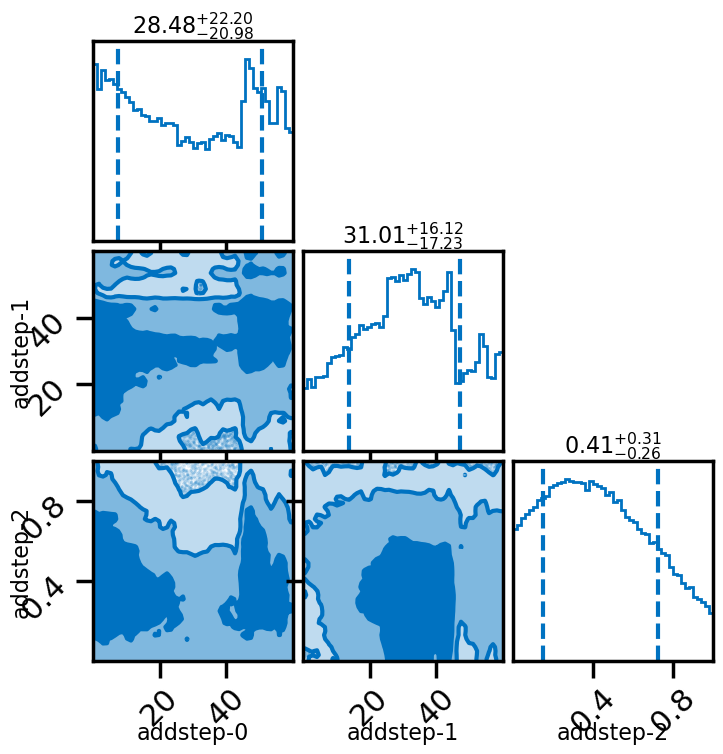

In [20]:
# Posterior of the mixing parameters. 
sns.set_context('poster')
result.plot_corner()

In [26]:
result.posterior

,addstep_0,addstep_1,addstep_2,log_likelihood,log_prior
0,49.535362,43.309205,0.622769,137.790075,-8.188689
1,59.960357,35.693019,0.026960,141.303538,-8.188689
2,58.341899,36.293967,0.099493,141.154984,-8.188689
3,51.542977,29.499620,0.078006,141.629500,-8.188689
4,6.459293,22.064571,0.435336,138.281954,-8.188689
...,...,...,...,...,...
100395,9.012510,12.837103,0.015780,139.890736,-8.188689
100396,31.201307,30.912064,0.010165,141.870927,-8.188689
100397,23.056605,36.049444,0.024638,141.198354,-8.188689
100398,57.925925,17.238932,0.423924,139.594802,-8.188689


## 4. Predictions

In [14]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(g, CI=[5,20,80,95])

(10000, 3)
using provided samples instead of posterior


In [15]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [16]:
per5.shape

(1, 12, 20)

In [17]:
mix_model.map

array([3.75906074e+01, 3.09352257e+01, 7.20520425e-06])

In [18]:
# Map value prediction for the step mixing function parameter
map_prediction = mix_model.evaluate(mix_model.map, g)

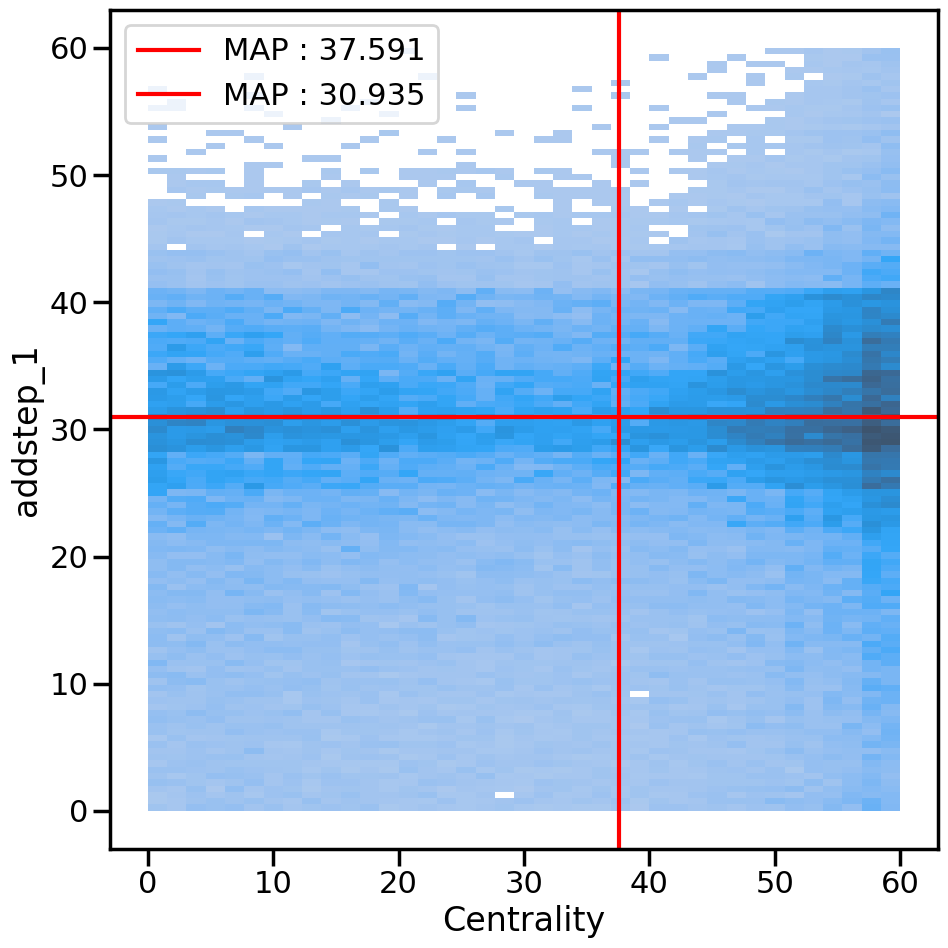

In [19]:
import os
fig, ax_hist = plt.subplots(figsize=(10,10))
sns.histplot(data=result.posterior, x='addstep_0', y='addstep_1', kde=True, ax=ax_hist)
ax_hist.axvline(x = mix_model.map[0], color = 'r', label = f'MAP : {mix_model.map[0]:.3f}') 
ax_hist.axhline(y = mix_model.map[1], color = 'r', label = f'MAP : {mix_model.map[1]:.3f}') 
ax_hist.set_xlabel('Centrality')
ax_hist.legend()
os.makedirs(outdir+'/figures/', exist_ok = True)
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'MAP_', dpi=100)

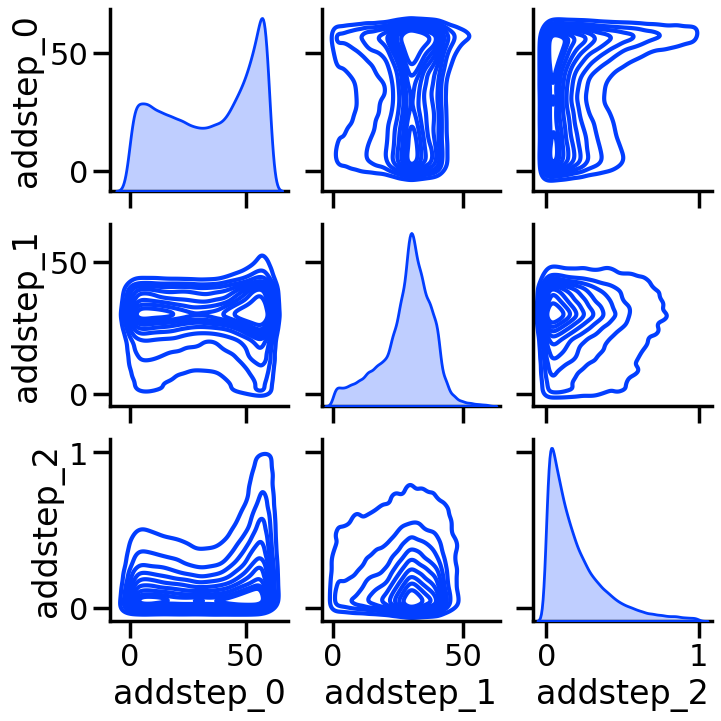

In [32]:
sns.pairplot(result.posterior[['addstep_0','addstep_1','addstep_2']], kind='kde', diag_kind='kde')

/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/dananjayaliyanage/miniconda3/envs/test_env/lib/python3.7/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)


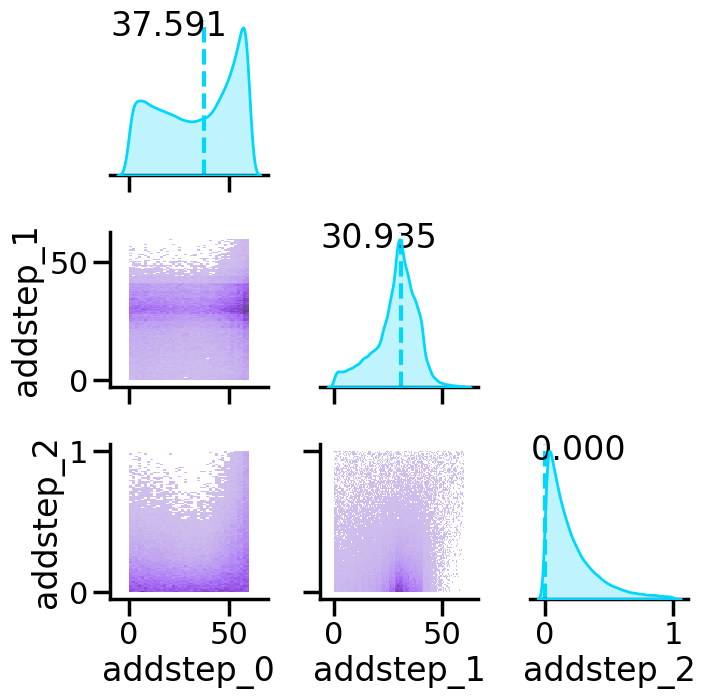

In [33]:
#sns.set_context("notebook", font_scale=1.5)
#sns.set_style("ticks")
map_parameters=mix_model.map.flatten()
sns.set_palette('bright')
observables_to_plot=[0, 1, 2]
gg = sns.PairGrid(result.posterior.iloc[:,observables_to_plot], corner=True, diag_sharey=False)
gg.map_lower(sns.histplot, color=sns.color_palette()[4])
#g.map_upper(sns.kdeplot, shade=True, color=sns.color_palette()[0])
gg.map_diag(sns.kdeplot, linewidth=2, shade=True, color=sns.color_palette()[9])
for n,i in enumerate(observables_to_plot):
    ax=gg.axes[n][n]
    ax.axvline(x=map_parameters[i], ls='--', c=sns.color_palette()[9])
    ax.text(0,0.9,s= f'{map_parameters[i]:.3f}', transform=ax.transAxes)

plt.tight_layout()
plt.savefig(outdir+'/figures/'+'posterior_', dpi=100)
plt.show()

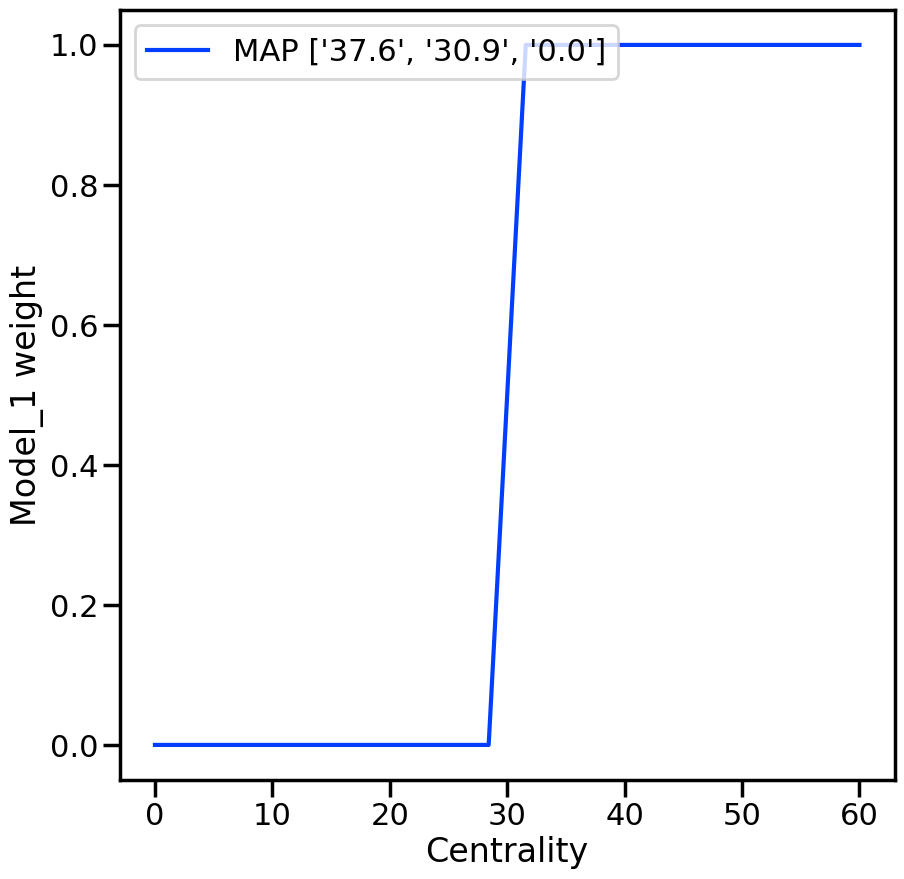

In [44]:
w1,_ = mix_model.evaluate_weights(mix_model.map.flatten(),g)
#w1,_ = mix_model.evaluate_weights(np.array([0.2, 0]),g)

fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title('MAP')
ax.plot(g, w1, label = 'MAP ' + str([f'{mp:.1f}' for mp in mix_model.map.flatten()]))
ax.set_xlabel('Centrality')
ax.set_ylabel('Model_1 weight')
ax.legend(loc='upper left')

In [21]:
obs_tex_labels = {
                    'dNch_deta' : r'$dN_{ch}/d\eta$',
                    'dN_dy_pion' : r'$dN_{\pi}/dy$',
                    'dN_dy_kaon' : r'$dN_{k}/dy$',
                    'dN_dy_proton' : r'$dN_{p}/dy$',
                    'dN_dy_Lambda' : r'$dN_{\Lambda}/dy$',
                    'dN_dy_Omega' : r'$dN_{\Omega}/dy$',
                    'dN_dy_Xi' : r'$dN_{\Xi}/dy$',
                    'dET_deta' : r'$dE_{T}/d\eta$',
                    'mean_pT_pion' : r'$\langle p_T \rangle _{\pi}$',
                    'mean_pT_kaon' : r'$\langle p_T \rangle _{k}$',
                    'mean_pT_proton' : r'$\langle p_T \rangle _{p}$',
                    'pT_fluct' : r'$\delta p_T / \langle p_T \rangle$',
                    'v22' : r'$v_2\{2\}$',
                    'v32' : r'$v_3\{2\}$',
                    'v42' : r'$v_4\{2\}$',
}

In [22]:
m1_prediction[0][:,i].flatten().shape

(20,)

In [23]:
len(g)

20

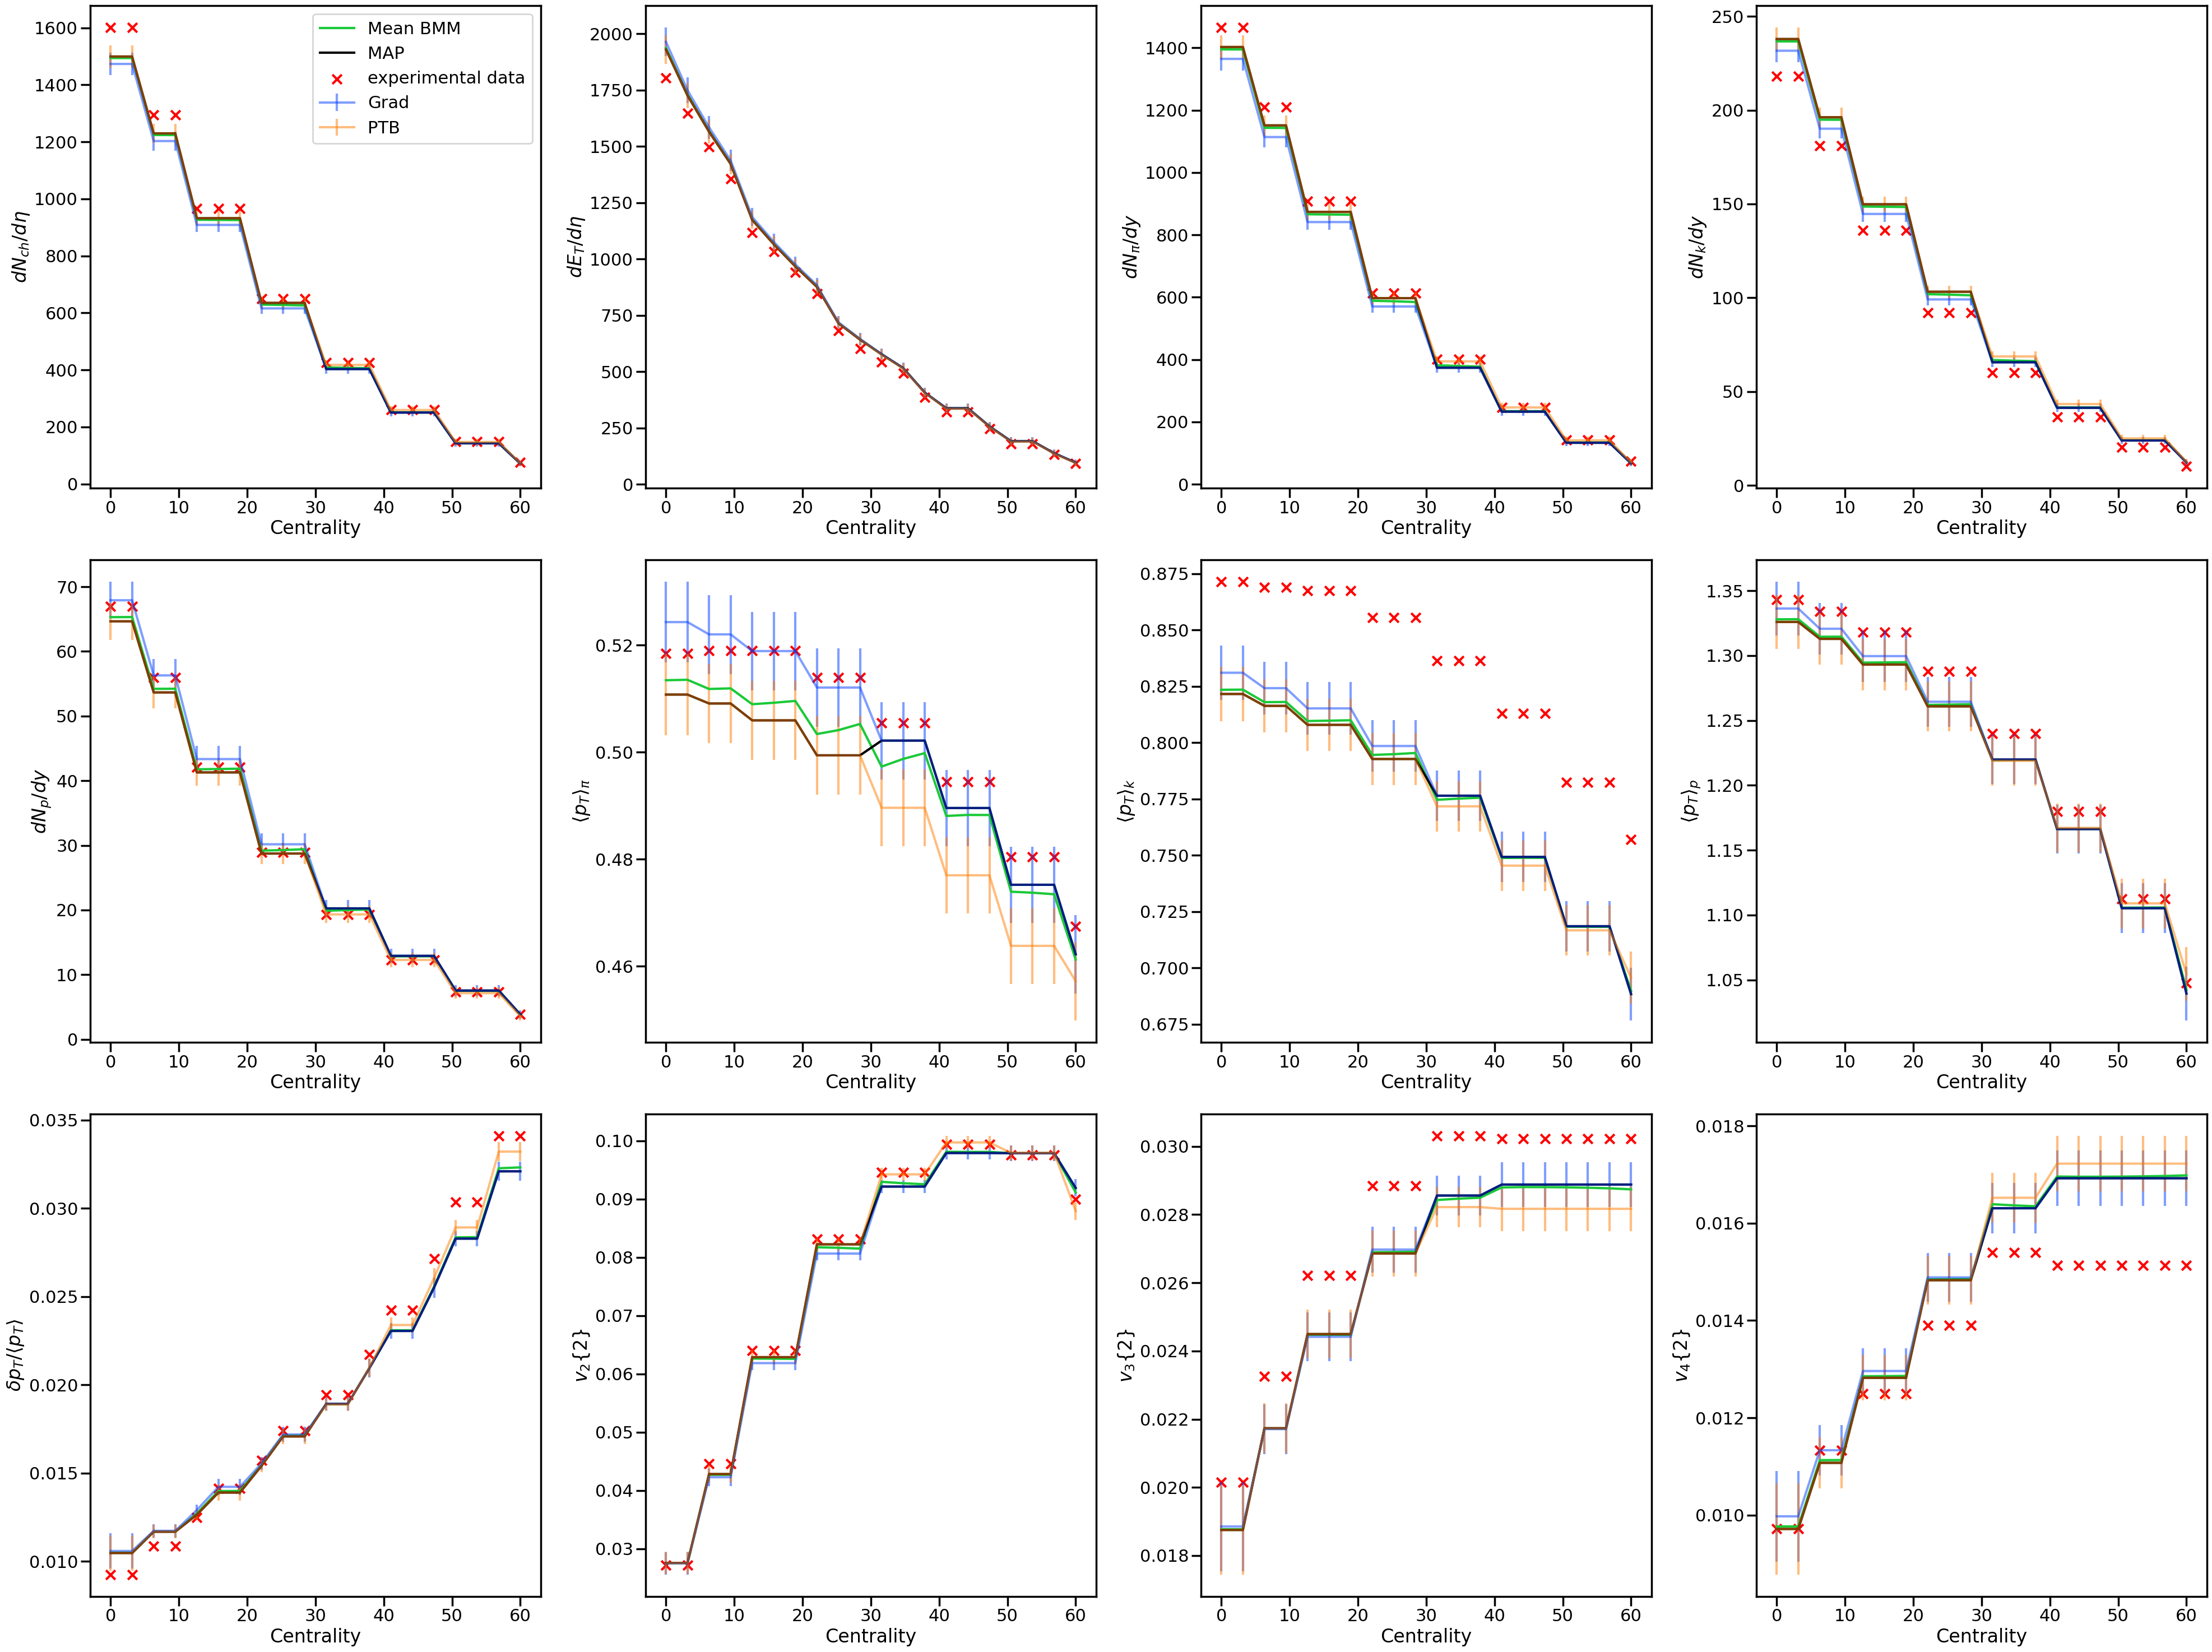

In [24]:
fig, axs = plt.subplots(3,4, figsize=(40,30))
sns.set_context('poster')
for i in range(0,12):
    ax_f= axs.flatten()[i]
    ax_f.errorbar(g, m1_prediction[0][:,i].flatten(), 
                yerr=m1_prediction[1][:,i].flatten(), 
                label='Grad', alpha=0.5)
    ax_f.errorbar(g, m2_prediction[0][:,i].flatten(), 
                yerr=m1_prediction[1][:,i].flatten(),
                label='PTB', alpha=0.5)
    # ax_f.plot(plot_g, m1_prediction[0][:,i].flatten(),
    #             label='Grad', alpha=0.8)
    # ax_f.plot(plot_g, m2_prediction[0][:,i].flatten(), 
    #             label='PTB', alpha=0.8)
    ax_f.plot(g, mean[0][i,:].flatten(), label='Mean BMM')
    ax_f.plot(g, map_prediction[i,:].flatten(), label='MAP', color='k')
    #ax_f.plot(plot_g, true_output[0], label='truth')
    ax_f.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data', color='r')
    ax_f.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax_f.set_ylabel(obs_tex_labels[obs_names[i]])
    if i ==0:
        ax_f.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'MAP_', dpi=100)

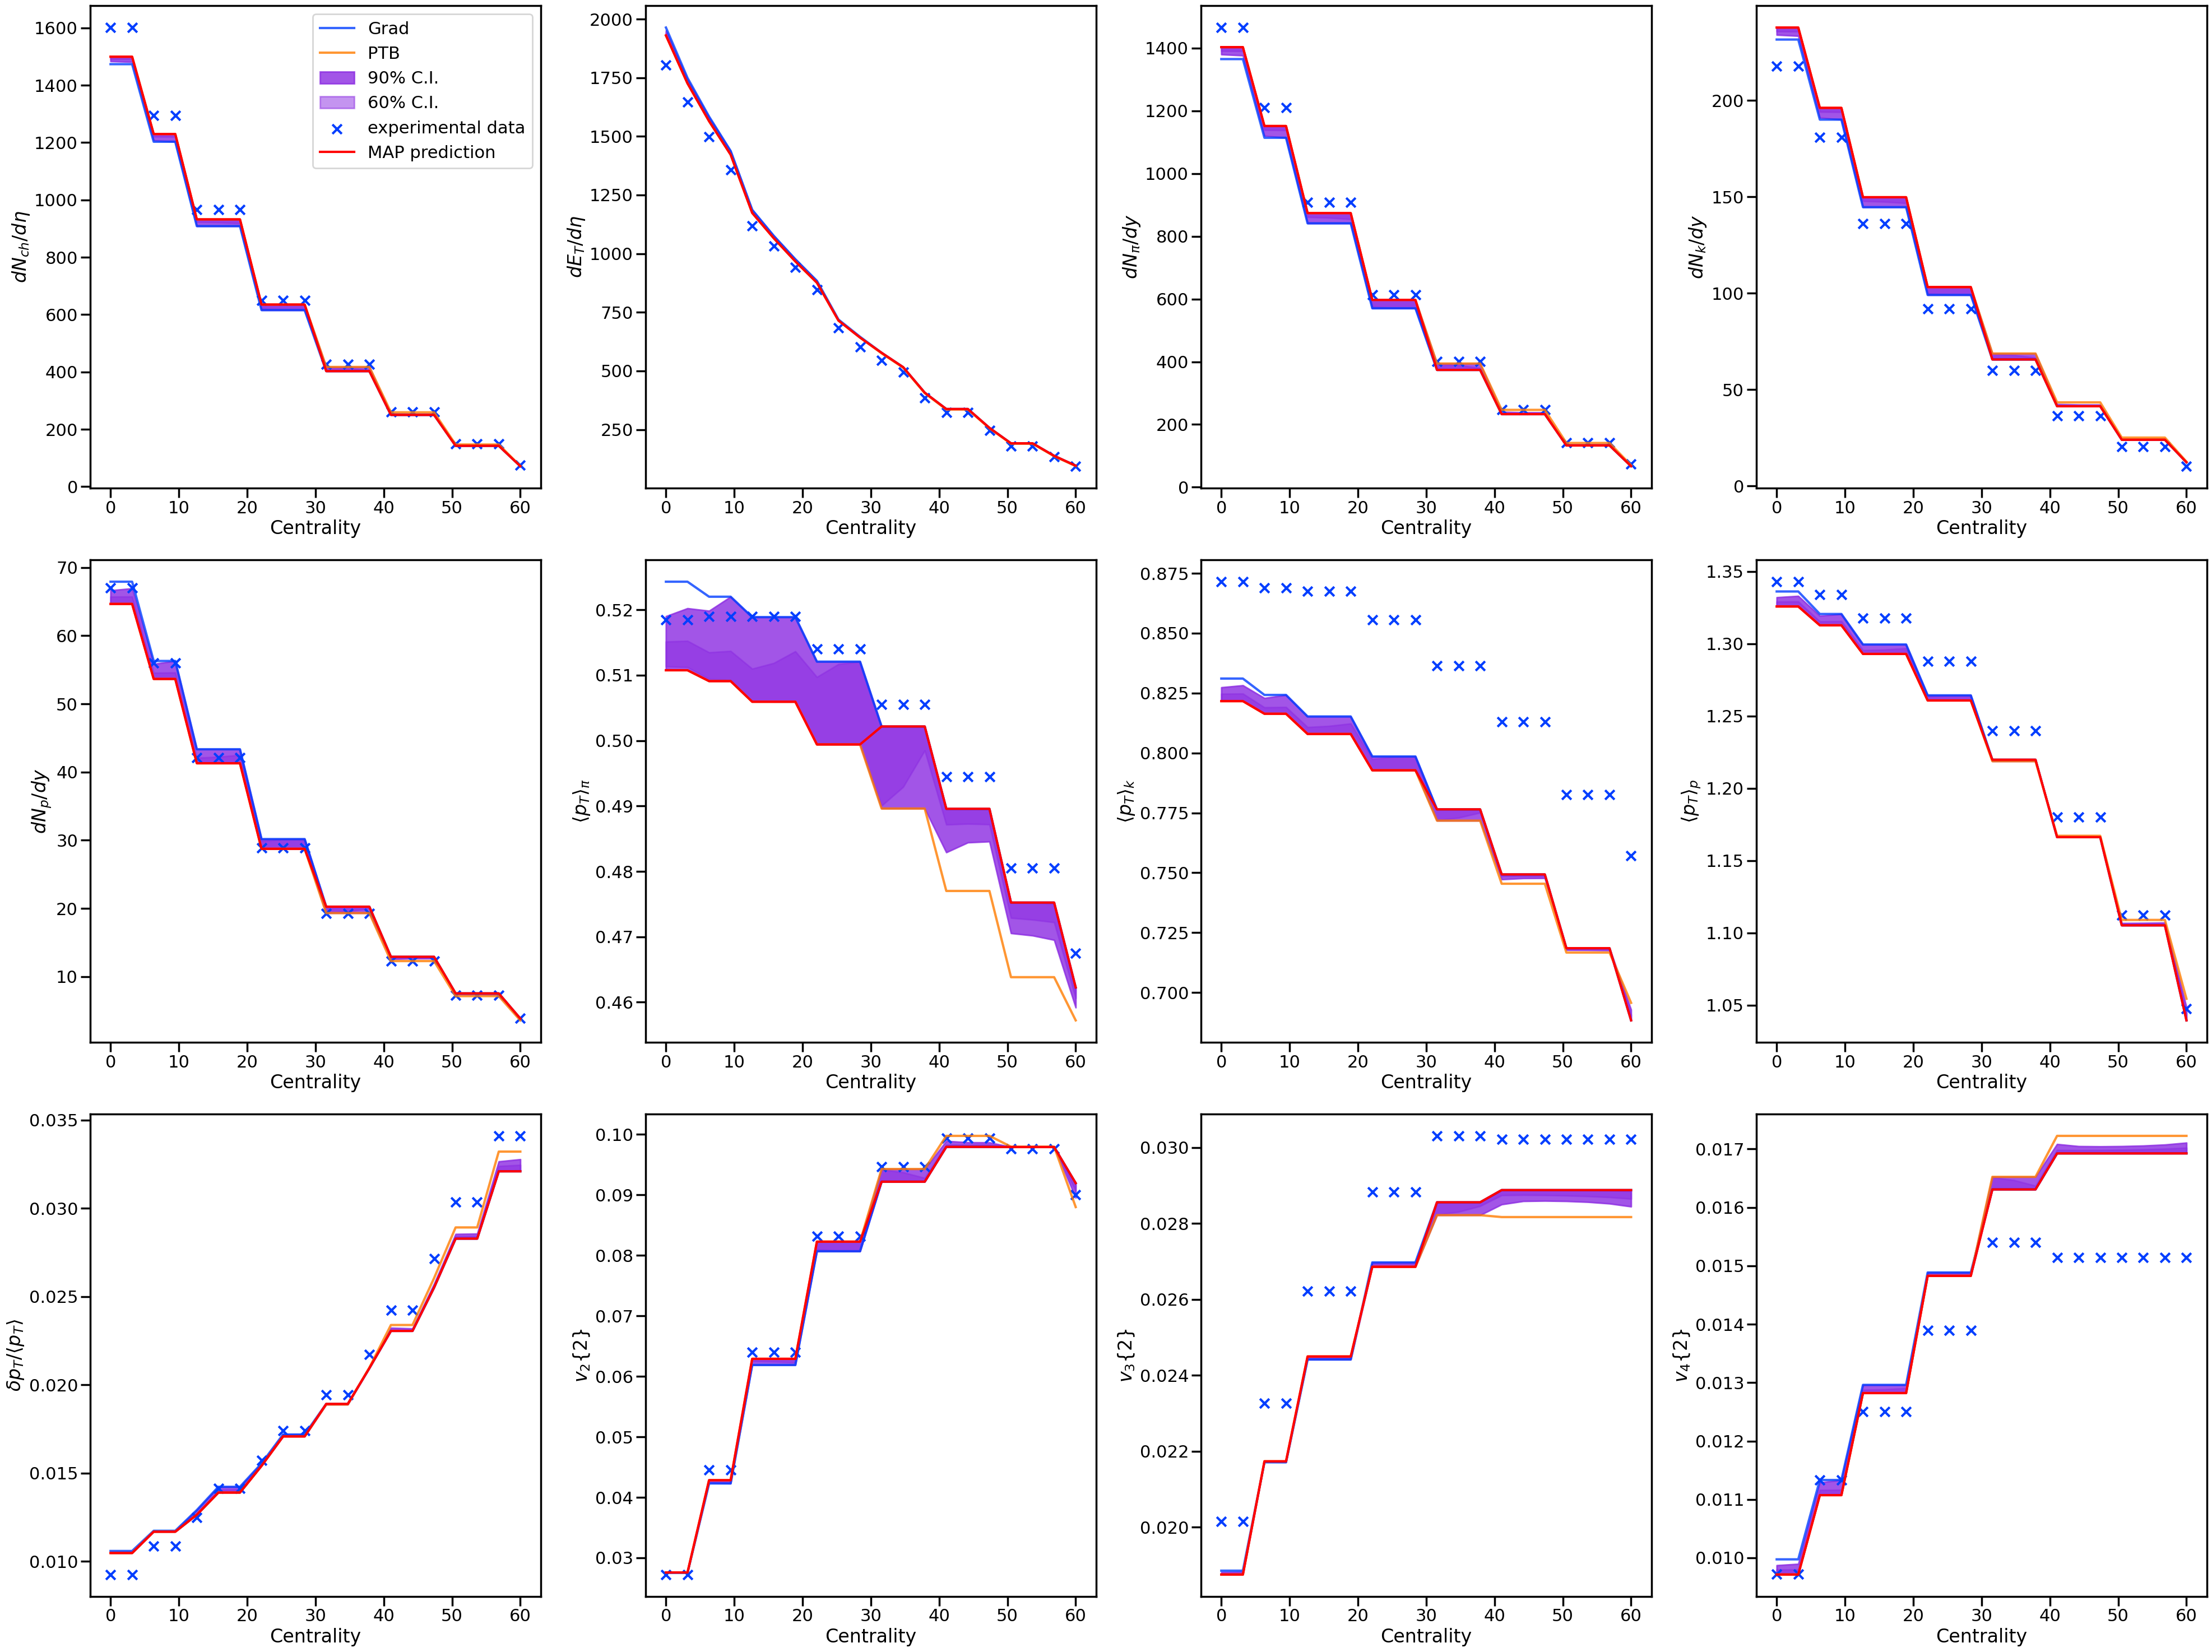

In [25]:
sns.set_context('poster')
fig, axs = plt.subplots(3, 4, figsize=(40,30))
for i in range(0,12):
    ax = axs.flatten()[i]
    #fig, ax = plt.subplots(figsize=(10,10))
    #ax.plot(plot_g, mean[0][i,:].flatten(), label='posterior mean')
    # ax_f.errorbar(plot_g, m1_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(), 
    #             label='Grad', alpha=0.2)
    # ax_f.errorbar(plot_g, m2_prediction[0][:,i].flatten(), 
    #             yerr=m1_prediction[1][:,i].flatten(),
    #             label='PTB', alpha=0.2)
    ax.plot(g, m1_prediction[0][:,i].flatten(),
                label='Grad', alpha=0.8)
    ax.plot(g, m2_prediction[0][:,i].flatten(), 
                label='PTB', alpha=0.8)
    ax.fill_between(g,per5[0][i,:].flatten(),per95[0][i,:].flatten(),color=sns.color_palette()[4], alpha=0.8, label='90% C.I.')
    ax.fill_between(g,per20[0][i,:].flatten(),per80[0][i,:].flatten(), color=sns.color_palette()[4], alpha=0.5, label='60% C.I.')
    #ax.fill_between(plot_g,prior20[0][i,:].flatten(),prior80[0][i,:].flatten(),color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
    ax.scatter(g,exp_data[0][:,i].flatten(), marker='x', label='experimental data')
    #ax.plot(plot_g, mean_prior[0][i,:].flatten(), label='prior mean')
    ax.plot(g, map_prediction[i,:].flatten(), label='MAP prediction', color='r')
    ax.set_xlabel('Centrality')
    #ax_f.set_ylim(1.2,3.2)
    ax.set_ylabel(obs_tex_labels[obs_names[i]])
    if i==0:
        ax.legend()
plt.tight_layout()
fig.savefig(outdir+'/figures/'+'posterior_predict_', dpi=100)